In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib as k
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('C:\\Users\\USER\\Downloads\\Telegram Desktop\\secondhand.csv')

In [4]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor
from sklearn.svm import LinearSVR

In [5]:
data.sample(10)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
433,434,524473,772232,3,124833,4,7,10,197,55,82,158031.5
133,134,660260,791726,2,75311,4,4,10,143,74,89,425960.0
896,897,699714,862931,6,89279,2,7,8,153,78,140,428955.5
783,784,573920,793513,6,129656,5,9,13,186,76,138,192576.0
34,35,630489,717182,5,96226,1,9,8,191,101,94,317119.0
107,108,684018,738298,3,130238,1,7,13,200,58,72,198738.0
999,1000,590105,779743,5,67295,4,2,8,199,99,96,414938.5
857,858,577791,755598,6,137347,3,3,14,164,70,131,113942.0
768,769,649156,810867,6,72457,4,4,10,153,76,113,437540.5
317,318,655721,806559,5,106474,3,2,12,197,115,115,304104.5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [7]:
data.duplicated().sum()

0

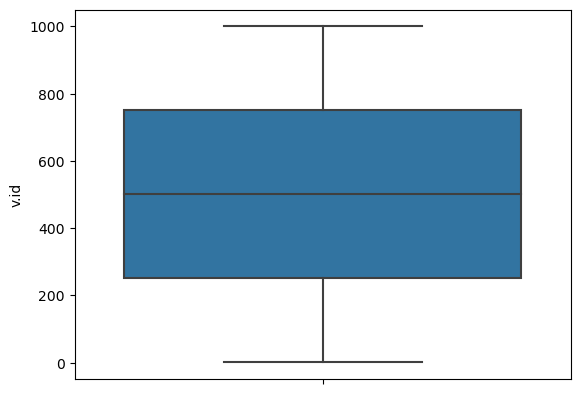

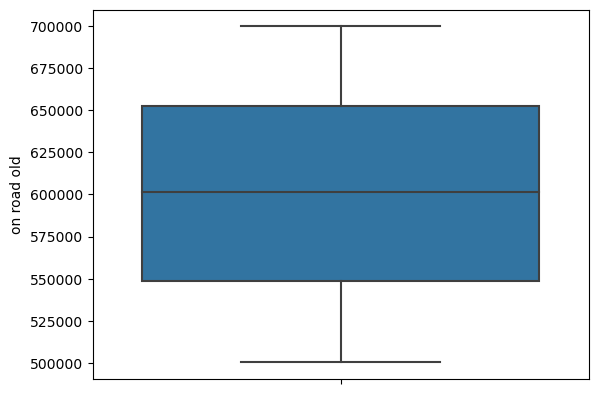

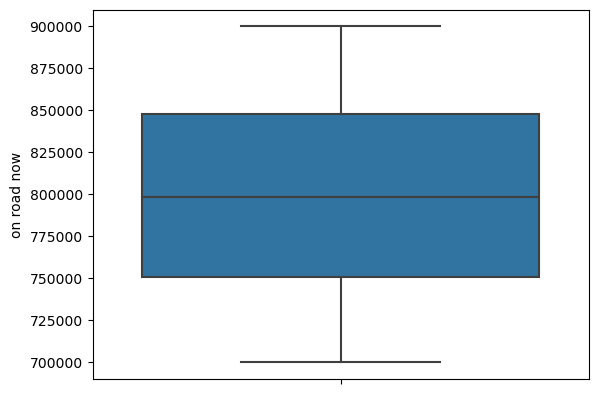

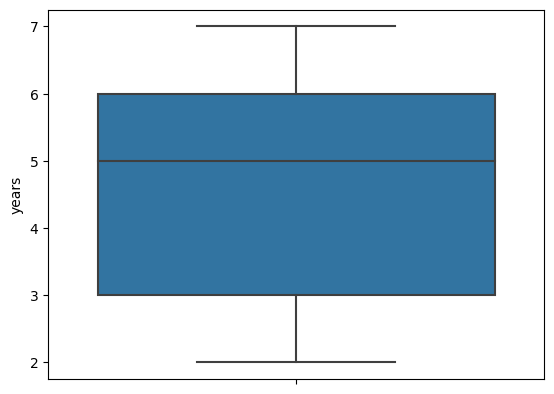

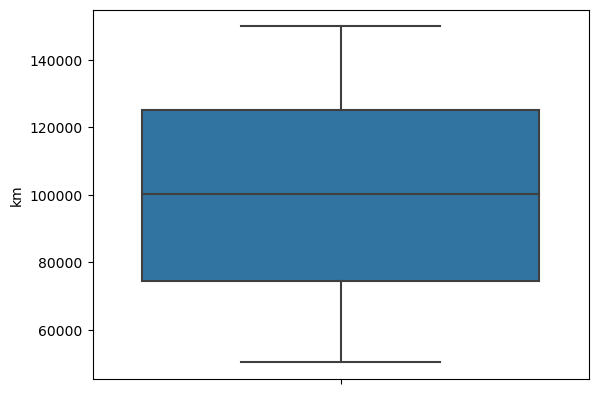

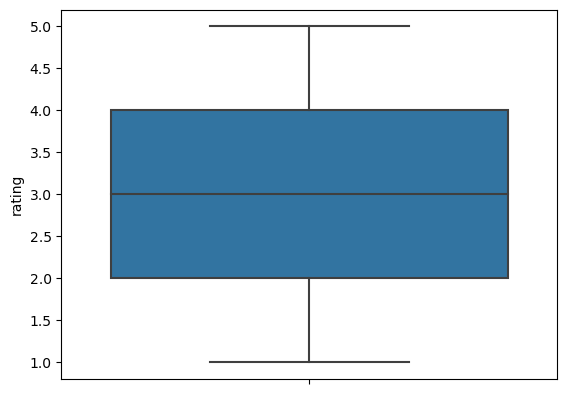

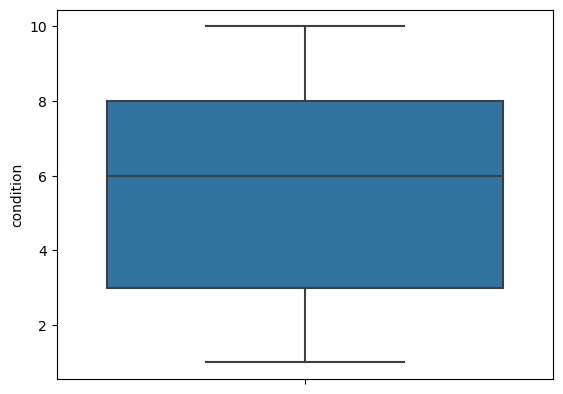

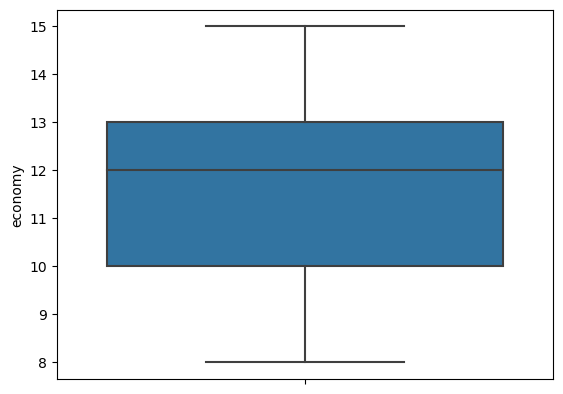

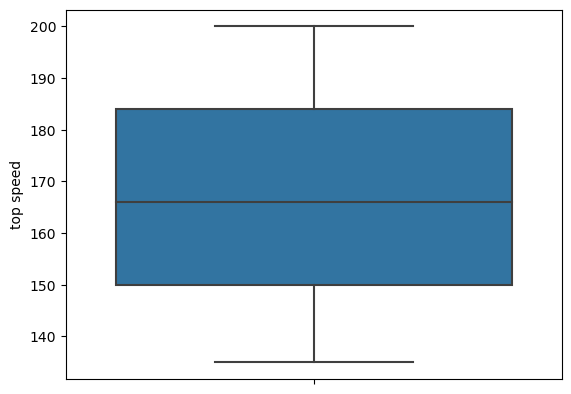

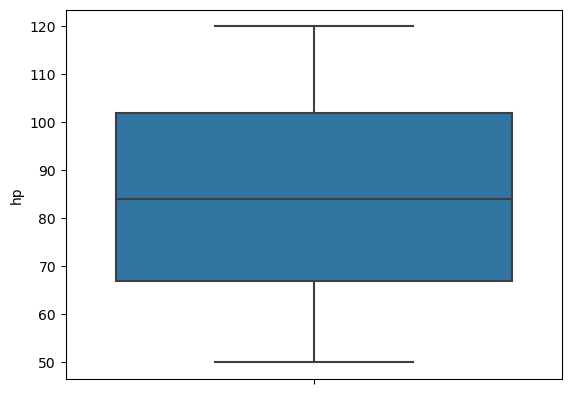

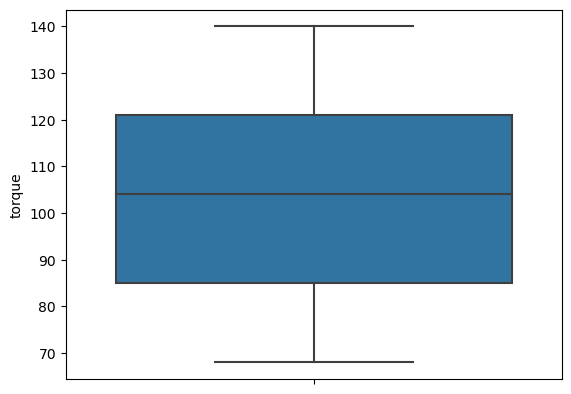

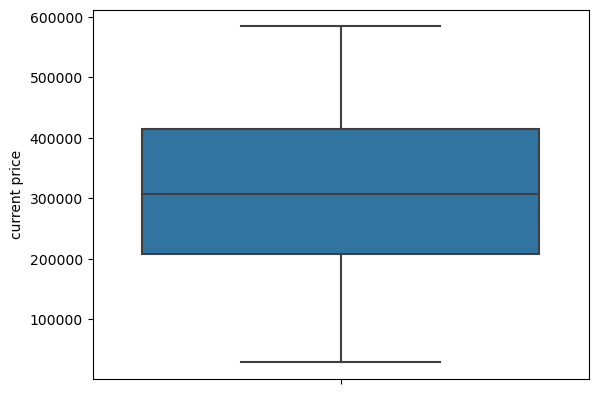

In [8]:
for i in data.columns:
    if data[i].dtype !='object':
        sns.boxplot(y=data[i])
        plt.show();

<AxesSubplot:>

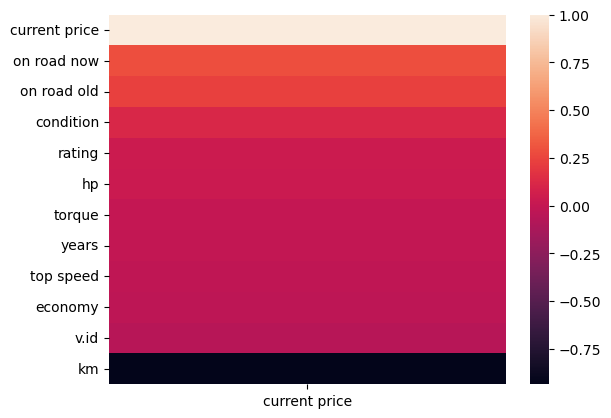

In [9]:
sns.heatmap(data.corr()[['current price']].sort_values(by='current price',ascending=False))

In [10]:
data.drop(['v.id'],axis=1,inplace=True)

<AxesSubplot:xlabel='km', ylabel='current price'>

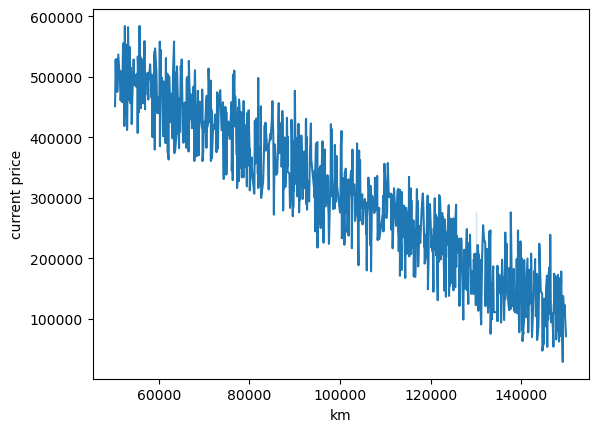

In [11]:
sns.lineplot(x='km',y='current price',data=data)

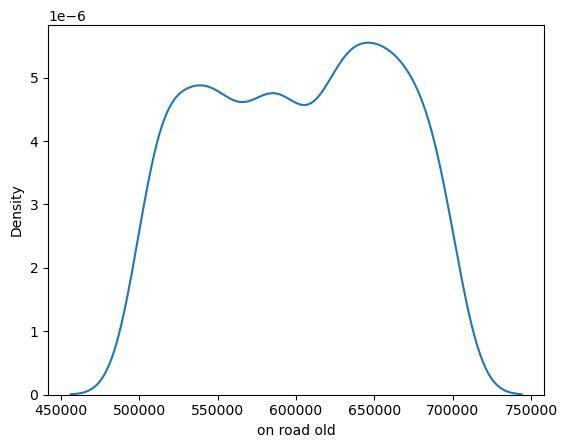

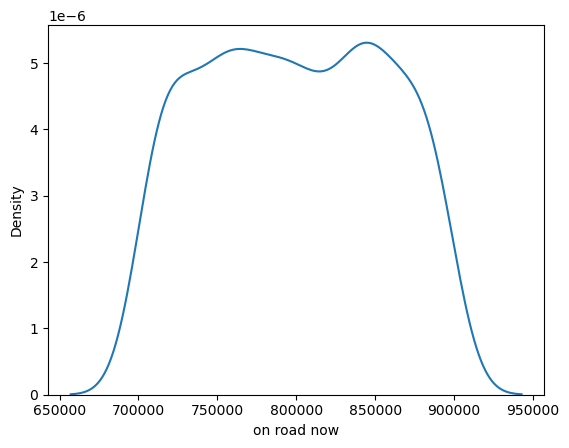

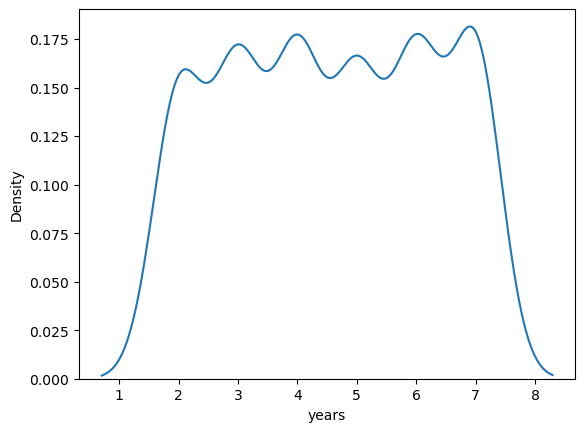

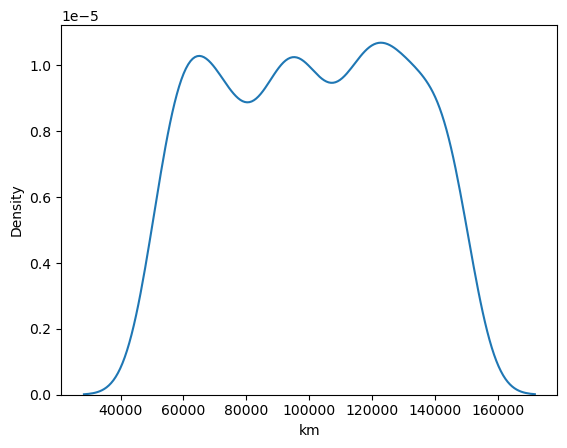

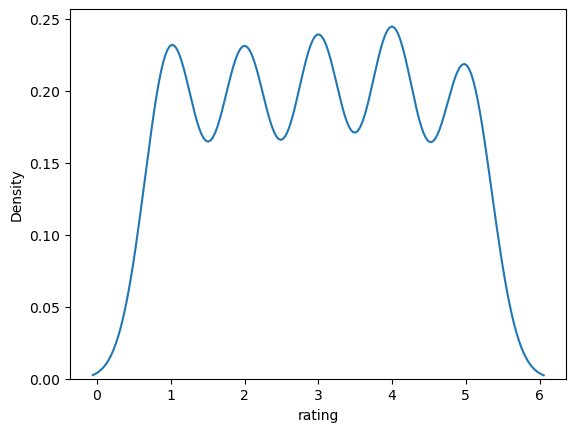

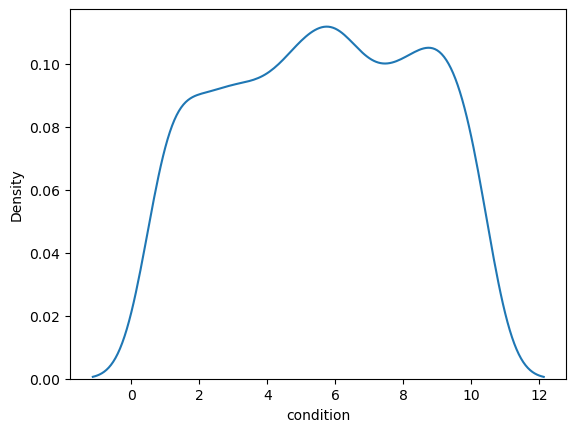

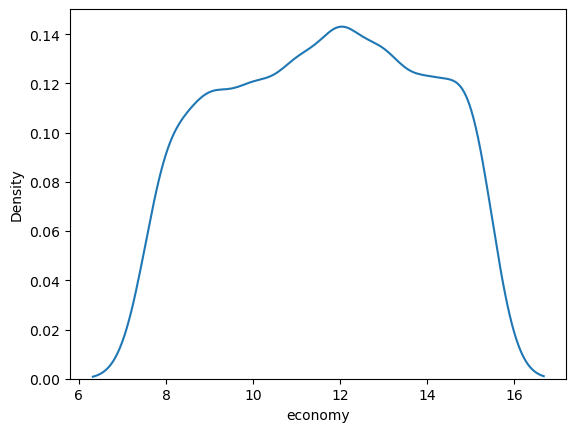

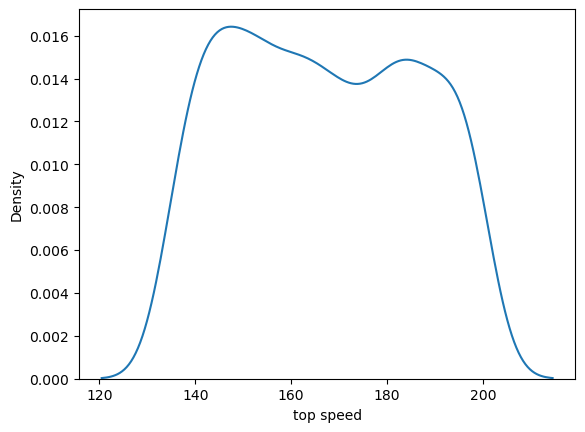

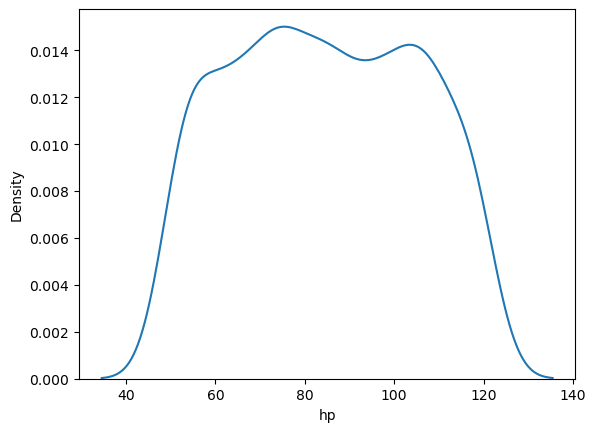

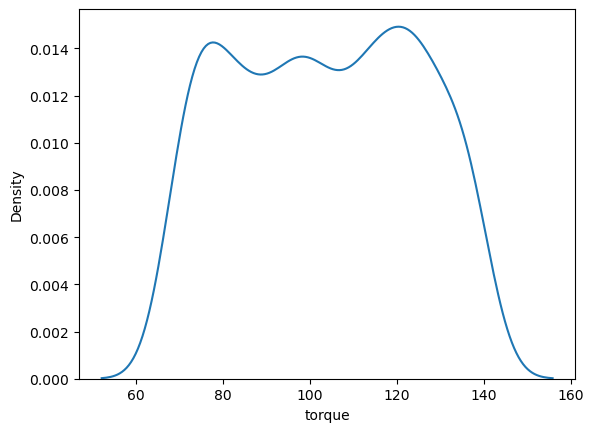

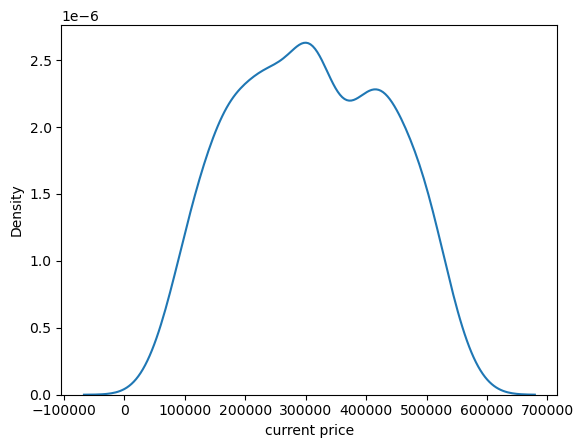

In [12]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.kdeplot(x =data[i], )
        plt.show()

In [13]:
x=data.iloc[:, :-1].values

In [14]:
x.shape

(1000, 10)

In [15]:
y=data[['current price']].values

In [16]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'LinerSVR':LinearSVR(),
    'Lasso':Lasso(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'BaggingRegressor':BaggingRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor(),
    'HistGradientBoostingRegressor':HistGradientBoostingRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(random_state=0),
}

In [19]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("model trained with {}".format(name))
    training_socre = model.score(x_train,y_train)*100
    testing_score = model.score(x_test,y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test,model.predict(x_test))
    mse =mean_squared_error(y_test,model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2_score",score)
    print("training_score",training_socre)
    print("testing_score",testing_score)
    print("mae",mae)
    print("mse",mse)
    print("------------------------------------------------")

model trained with LinearRegression
r2_score 99.52376165143042
training_score 99.52214575200117
testing_score 99.52376165143042
mae 7395.269735273933
mse 73607593.01790327
------------------------------------------------
model trained with Ridge
r2_score 99.52288781641971
training_score 99.52199877454294
testing_score 99.52288781641971
mae 7399.938101129681
mse 73742653.3128712
------------------------------------------------
model trained with LinerSVR
r2_score -606.5960840344003
training_score -593.9002354625653
testing_score -606.5960840344003
mae 306196.0764451881
mse 109211778383.38223
------------------------------------------------
model trained with Lasso
r2_score 99.52378718163304
training_score 99.5221456869135
testing_score 99.52378718163304
mae 7395.2114621899245
mse 73603647.05939539
------------------------------------------------
model trained with GradientBoostingRegressor
r2_score 99.45582543519518
training_score 99.84431009298869
testing_score 99.45582543519518
mae 73

In [20]:
model=Lasso()

In [21]:
model.fit(x_train,y_train)

Lasso()

In [22]:
y_pred=model.predict(x)

In [23]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [24]:
OUTPUT.head(20)

,ACTUAL,PREDICTION
0,351318.0,345470.504393
1,285001.5,280469.067233
2,215386.0,225008.417672
3,244295.5,241449.423275
4,531114.5,528443.346463
5,177933.5,175969.628086
6,410877.0,407845.982055
7,467471.5,461940.502966
8,462397.5,472999.028134
9,197266.0,198503.879266


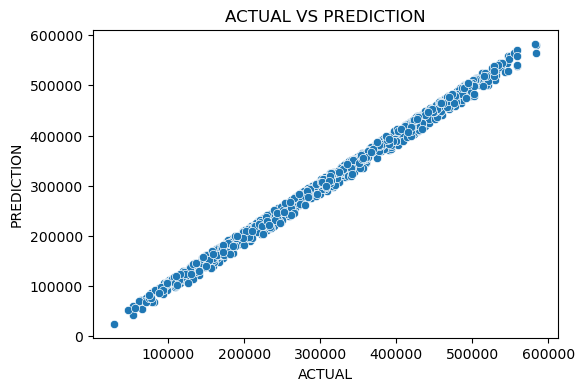

In [25]:
plt.figure(figsize=(6,4))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");